# MSiA 420 - Predictive Analytics II - Final Project
## Group 6: Alejandra Lelo de Larrea Ibarra, Kiran Jyothi Sheena, Lixuan (Ellen) Chen, Wencheng Zhang
# Naive Bayes Classifier

In [62]:
import pandas as pd
import numpy as np
from alepython import ale_plot

In [63]:
#loading data
total_data = pd.read_csv('hotel_bookings_ohe.csv')
train_index = pd.read_csv('train_index.csv')

In [64]:
#select train data from training index
train = total_data.iloc[train_index.Train_Index,:]
train.reset_index(inplace=True)
train.head()

,index,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,35564,2017,2,0,0,0,0,1,4.663439,2,...,1,0,0,0,1,0,0,1,0,0
1,24402,2016,1,0,0,0,0,0,0.000000,1,...,0,0,1,0,0,0,0,1,0,0
2,117756,2017,2,1,1,0,1,1,5.135798,7,...,1,0,1,0,0,0,0,1,0,0
3,5653,2016,2,0,0,0,0,0,3.044522,2,...,0,0,1,0,0,0,0,1,0,1
4,105241,2017,1,0,0,0,0,0,0.693147,1,...,0,0,1,0,0,0,0,1,0,0


In [65]:
#select test data
test = total_data.iloc[total_data.index.difference(train_index.Train_Index),:]
test.reset_index(inplace=True)
test.head()


,index,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,...,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1,is_canceled
0,2,2015,1,0,0,0,0,0,2.079442,1,...,0,0,1,0,0,0,0,1,0,0
1,3,2015,1,0,0,0,0,0,2.639057,1,...,0,0,1,0,0,0,0,1,0,0
2,8,2015,2,0,0,0,0,1,4.454347,3,...,1,0,1,0,0,0,0,1,0,1
3,9,2015,2,0,0,0,0,0,4.330733,3,...,0,0,0,0,1,0,0,1,0,1
4,10,2015,2,0,0,0,0,0,3.178054,4,...,1,0,1,0,0,0,0,1,0,1


In [66]:
#select train x, train y, test x, test y
train_x = train.drop(['index','is_canceled'],axis=1)
train_y = train['is_canceled']

test_x = test.drop(['index','is_canceled'],axis=1)
test_y = test['is_canceled']


# Naive Beyes Classifier - Gaussian Naive Bayes Algorithm

In [67]:
# standardization for train and test data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #we can use RobustScaler() to avoid the outlier influence
train_x  = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [68]:
train_x

array([[ 1.19499902,  0.25510164, -0.25913679, ..., -0.09807828,
         0.25624549, -0.25624549],
       [-0.22067084, -1.51458261, -0.25913679, ..., -0.09807828,
         0.25624549, -0.25624549],
       [ 1.19499902,  0.25510164,  2.25461637, ..., -0.09807828,
         0.25624549, -0.25624549],
       ...,
       [-1.63634071,  0.25510164, -0.25913679, ..., -0.09807828,
         0.25624549, -0.25624549],
       [-1.63634071,  0.25510164, -0.25913679, ..., -0.09807828,
         0.25624549, -0.25624549],
       [-0.22067084,  0.25510164, -0.25913679, ..., -0.09807828,
         0.25624549, -0.25624549]])

In [69]:
#for visualization purpose
ale_df = pd.DataFrame(train_x)
ale_df.columns  = train.drop(columns = ["index","is_canceled"]).columns
ale_df.head()

,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,previous_bookings,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1
0,1.194999,0.255102,-0.259137,-0.079146,-0.103412,-0.339409,0.541825,0.509602,-0.557767,-0.121899,...,-0.506124,1.056154,-0.004576,-1.846940,-0.08367,2.698034,-0.313399,-0.098078,0.256245,-0.256245
1,-0.220671,-1.514583,-0.259137,-0.079146,-0.103412,-0.339409,-0.719791,-2.391463,-0.946574,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
2,1.194999,0.255102,2.254616,10.108578,-0.103412,1.200680,0.541825,0.803450,1.386271,-0.121899,...,-0.506124,1.056154,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
3,-0.220671,0.255102,-0.259137,-0.079146,-0.103412,-0.339409,-0.719791,-0.497505,-0.557767,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
4,1.194999,-1.514583,-0.259137,-0.079146,-0.103412,-0.339409,-0.719791,-1.960265,-0.946574,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245


In [70]:
#cross validation and grid search for parameters optimization

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification

gnb = GaussianNB() #define model
param_grid = {'var_smoothing': [1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]} #grid search to select the best parameters

grid_search = GridSearchCV(gnb, param_grid, cv=10, scoring='roc_auc') #10 fold cross validation by using AUC as a decision point
grid_search.fit(train_x, train_y)


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='roc_auc')

In [71]:
#the best model in Naive Bayes Classifiers
print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation AUC score:', grid_search.best_score_)


Best hyperparameters: {'var_smoothing': 0.01}
Best cross-validation AUC score: 0.8301650451392858


In [72]:
import time
train_time = time.time()

gnb_retrain = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
gnb_retrain.fit(train_x, train_y)

train_time = time.time() - train_time

print('GaussianNB Running time: ',train_time )

GaussianNB Running time:  0.10581183433532715


In [73]:
#retrain  Naive Bayes Classifiers, and predict test set


y_pred = gnb_retrain.predict(test_x)

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(test_y, y_pred)
cm


array([[7012, 8037],
       [ 793, 8035]])

In [74]:
#classification metrices in test set [f1-score]
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.47      0.61     15049
           1       0.50      0.91      0.65      8828

    accuracy                           0.63     23877
   macro avg       0.70      0.69      0.63     23877
weighted avg       0.75      0.63      0.63     23877



In [75]:
# Compute the misclassification rate
cm = confusion_matrix(test_y, y_pred)

misclass_rate = (cm[0,1] + cm[1,0]) / sum(sum(cm))

print("Misclassification rate in test dataset: ", misclass_rate)

Misclassification rate in test dataset:  0.3698119529254094


In [76]:
#AUC performance in test set
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(test_y, y_pred)
print('ROC AUC in test dataset : {:.4f}'.format(ROC_AUC))


ROC AUC in test dataset : 0.6881


## Interpretation for Naive_bayes_calssifier

In [77]:
#Interpretation for Naive_bayes_calssifier
gnb_retrain

GaussianNB(var_smoothing=0.01)

In [78]:
ale_df

,arrival_date_year,adults,children,babies,previous_cancellations,booking_changes,total_of_special_requests,log_lead_time,total_nights,previous_bookings,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,required_car_parking_0,required_car_parking_1
0,1.194999,0.255102,-0.259137,-0.079146,-0.103412,-0.339409,0.541825,0.509602,-0.557767,-0.121899,...,-0.506124,1.056154,-0.004576,-1.846940,-0.08367,2.698034,-0.313399,-0.098078,0.256245,-0.256245
1,-0.220671,-1.514583,-0.259137,-0.079146,-0.103412,-0.339409,-0.719791,-2.391463,-0.946574,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
2,1.194999,0.255102,2.254616,10.108578,-0.103412,1.200680,0.541825,0.803450,1.386271,-0.121899,...,-0.506124,1.056154,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
3,-0.220671,0.255102,-0.259137,-0.079146,-0.103412,-0.339409,-0.719791,-0.497505,-0.557767,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
4,1.194999,-1.514583,-0.259137,-0.079146,-0.103412,-0.339409,-0.719791,-1.960265,-0.946574,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95506,-0.220671,0.255102,-0.259137,-0.079146,-0.103412,2.740769,-0.719791,0.695858,-0.168959,-0.121899,...,-0.506124,1.056154,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245
95507,1.194999,0.255102,-0.259137,-0.079146,-0.103412,-0.339409,1.803441,0.372252,-0.168959,-0.121899,...,-0.506124,1.056154,-0.004576,-1.846940,-0.08367,-0.370640,3.190821,-0.098078,0.256245,-0.256245
95508,-1.636341,0.255102,-0.259137,-0.079146,1.094529,-0.339409,-0.719791,1.278786,-0.557767,0.426819,...,1.975800,-0.946831,-0.004576,-1.846940,-0.08367,2.698034,-0.313399,-0.098078,0.256245,-0.256245
95509,-1.636341,0.255102,-0.259137,-0.079146,-0.103412,-0.339409,0.541825,-0.899764,0.608656,-0.121899,...,-0.506124,-0.946831,-0.004576,0.541436,-0.08367,-0.370640,-0.313399,-0.098078,0.256245,-0.256245


In [79]:
gnb_retrain

GaussianNB(var_smoothing=0.01)

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


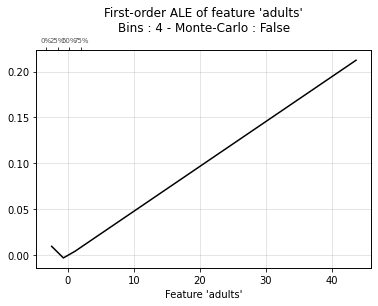

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


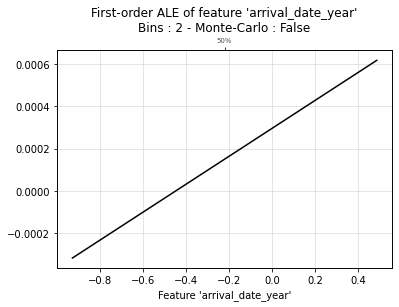

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


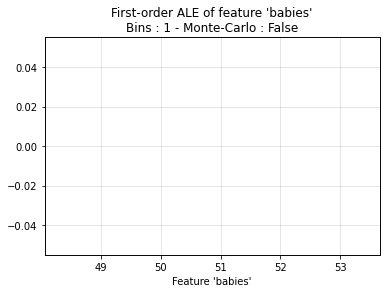

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


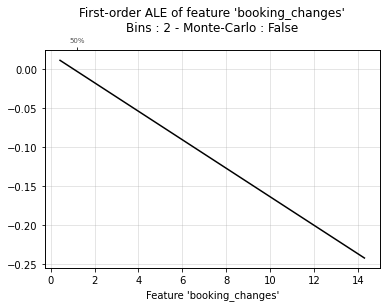

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


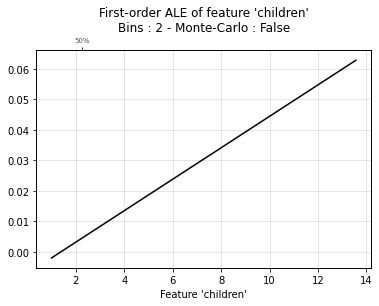

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


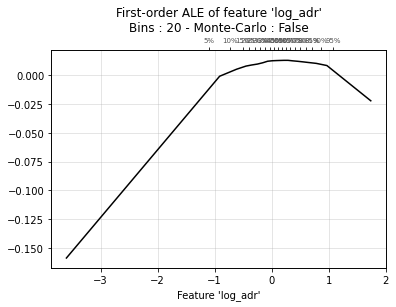

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


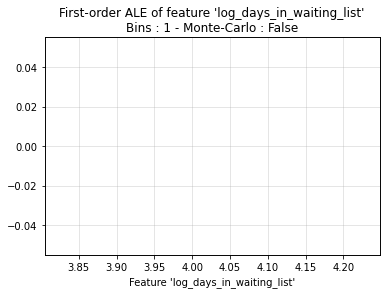

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


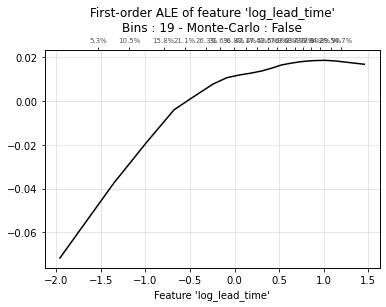

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


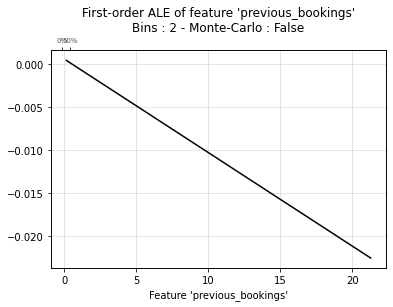

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


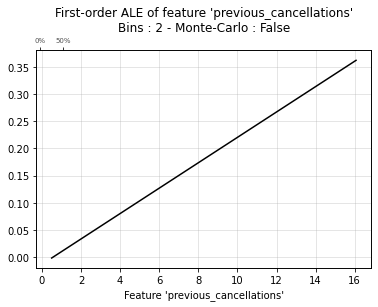

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


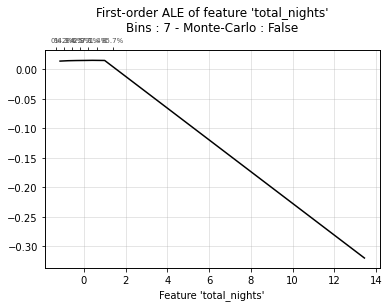

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


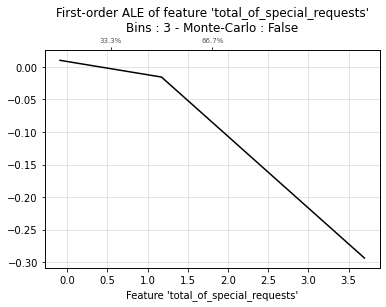

In [80]:
num_cols = ['adults', 'arrival_date_year', 
            'babies', 'booking_changes', 'children', 'log_adr',
            'log_days_in_waiting_list', 'log_lead_time',
            'previous_bookings', 'previous_cancellations', 'total_nights',
            'total_of_special_requests']

for col in num_cols:
    ale_plot(gnb_retrain, ale_df, col, bins=20)


/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


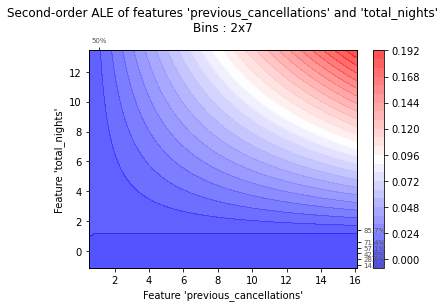

<AxesSubplot: title={'center': "Second-order ALE of features 'previous_cancellations' and 'total_nights'\nBins : 2x7"}, xlabel="Feature 'previous_cancellations'", ylabel="Feature 'total_nights'">

In [81]:
ale_plot(gnb_retrain, ale_df, ['previous_cancellations','total_nights'], bins=20)

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


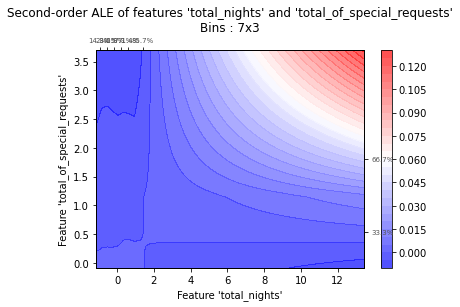

<AxesSubplot: title={'center': "Second-order ALE of features 'total_nights' and 'total_of_special_requests'\nBins : 7x3"}, xlabel="Feature 'total_nights'", ylabel="Feature 'total_of_special_requests'">

In [82]:
ale_plot(gnb_retrain, ale_df, ['total_nights','total_of_special_requests'], bins=20)

/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


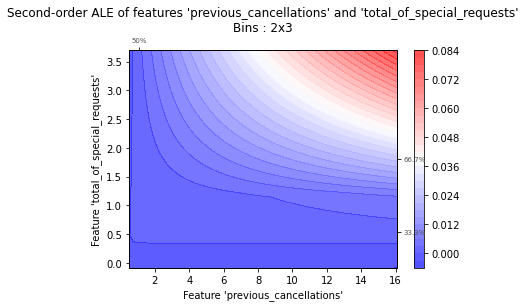

<AxesSubplot: title={'center': "Second-order ALE of features 'previous_cancellations' and 'total_of_special_requests'\nBins : 2x3"}, xlabel="Feature 'previous_cancellations'", ylabel="Feature 'total_of_special_requests'">

In [83]:
ale_plot(gnb_retrain, ale_df, ['previous_cancellations','total_of_special_requests'], bins=20)